In [0]:
!pip install --upgrade threadpoolctl

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Not uninstalling threadpoolctl at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4d08220-f726-4cfc-a7ca-2b1823b69663
    Can't uninstall 'threadpoolctl'. No files were found to uninstall.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [0]:
df = pd.read_csv('Long-Short_Equity.csv')
df.shape

(58, 16)

In [0]:
df.head()

,AUM,NetFlows,Return,Fund,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn
0,1.517838e+09,-1.024069e+08,-0.000290,AB Select US Long/Short Portfolio,1.55,5.0,5.000000,3671,1.422658e+11,1.032871e+09,0.000272,0.531086,0.000307,0.646922,31.034483,63.793103
1,5.677665e+08,1.062613e+07,0.000182,AQR Long-Short Equity Fund,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448
2,7.869107e+07,-2.098664e+05,-0.000306,AXS Dynamic Opportunity Fund,1.72,3.0,3.000000,2902,6.873105e+09,6.973458e+07,0.000175,0.207238,0.000310,0.658985,17.241379,32.758621
3,4.679206e+08,-1.321287e+07,-0.000208,Alger Dynamic Opportunities Fund,0.87,5.0,5.000000,4807,2.764655e+10,4.306798e+08,0.000333,0.700742,0.000397,0.825240,15.517241,87.931034
4,6.273995e+08,-8.593926e+06,-0.000170,Allspring Global Long/Short Equity Fund,1.47,2.0,2.416667,2941,5.532944e+10,5.297114e+08,0.000420,0.852614,0.000368,0.777297,55.172414,34.482759


In [0]:
# store features that we need in X
X = df.copy()
X.drop(['Fund'], axis=1, inplace=True)

In [0]:
X.head()

,AUM,NetFlows,Return,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn
0,1.517838e+09,-1.024069e+08,-0.000290,1.55,5.0,5.000000,3671,1.422658e+11,1.032871e+09,0.000272,0.531086,0.000307,0.646922,31.034483,63.793103
1,5.677665e+08,1.062613e+07,0.000182,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448
2,7.869107e+07,-2.098664e+05,-0.000306,1.72,3.0,3.000000,2902,6.873105e+09,6.973458e+07,0.000175,0.207238,0.000310,0.658985,17.241379,32.758621
3,4.679206e+08,-1.321287e+07,-0.000208,0.87,5.0,5.000000,4807,2.764655e+10,4.306798e+08,0.000333,0.700742,0.000397,0.825240,15.517241,87.931034
4,6.273995e+08,-8.593926e+06,-0.000170,1.47,2.0,2.416667,2941,5.532944e+10,5.297114e+08,0.000420,0.852614,0.000368,0.777297,55.172414,34.482759


In [0]:
correlation = X['StdDev_1Y'].corr(X['StdDev_Percentile_1Y'])
print("Correlation between StdDev_1Y and StdDev_Percentile_1Y:", correlation)

Correlation between StdDev_1Y and StdDev_Percentile_1Y: 0.8963743027067053


In [0]:
X.describe()

,AUM,NetFlows,Return,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn
count,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,3.296715e+08,-8.720818e+06,-0.000219,1.477759,3.189655,3.208333,4000.258621,5.508700e+10,1.032718e+08,0.000361,0.654202,0.000403,0.765138,50.862069,50.862069
std,7.413540e+08,5.173100e+07,0.000232,0.507443,1.016649,0.923123,1878.487611,1.181108e+11,7.033437e+08,0.000156,0.270792,0.000127,0.219664,29.115308,29.115308
min,1.660587e+06,-3.540519e+08,-0.000722,0.000000,1.000000,1.333333,2188.000000,3.646450e+08,-2.094387e+09,0.000087,0.028302,0.000086,0.016239,1.724138,1.724138
25%,3.202293e+07,-2.630788e+06,-0.000408,1.242500,3.000000,2.520833,2690.000000,4.400498e+09,3.271358e+06,0.000255,0.473167,0.000321,0.693396,26.293103,26.293103
50%,1.019616e+08,-3.214058e+05,-0.000197,1.435000,3.000000,3.041667,3376.500000,1.144884e+10,5.470625e+07,0.000339,0.712805,0.000389,0.810238,50.862069,50.862069
75%,2.702020e+08,1.851415e+06,-0.000034,1.750000,4.000000,3.979167,4593.000000,3.124948e+10,1.301717e+08,0.000441,0.877784,0.000476,0.924296,75.431034,75.431034
max,5.232261e+09,5.982385e+07,0.000224,2.810000,5.000000,5.000000,11086.000000,4.956571e+11,4.083517e+09,0.000920,0.996752,0.000745,0.994587,100.000000,100.000000


##1. Data Transformation
reference and math: [Amazon-Data Preprocess for K-means](https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf)

In [0]:
# we drop netflows becasue they like are our y - our lable
X.columns
X_2=X.copy()
X_2=X_2.drop(columns=['NetFlows','SumNetFlows'])

In [0]:
# normalized X
X_scale = StandardScaler().fit_transform(X_2)

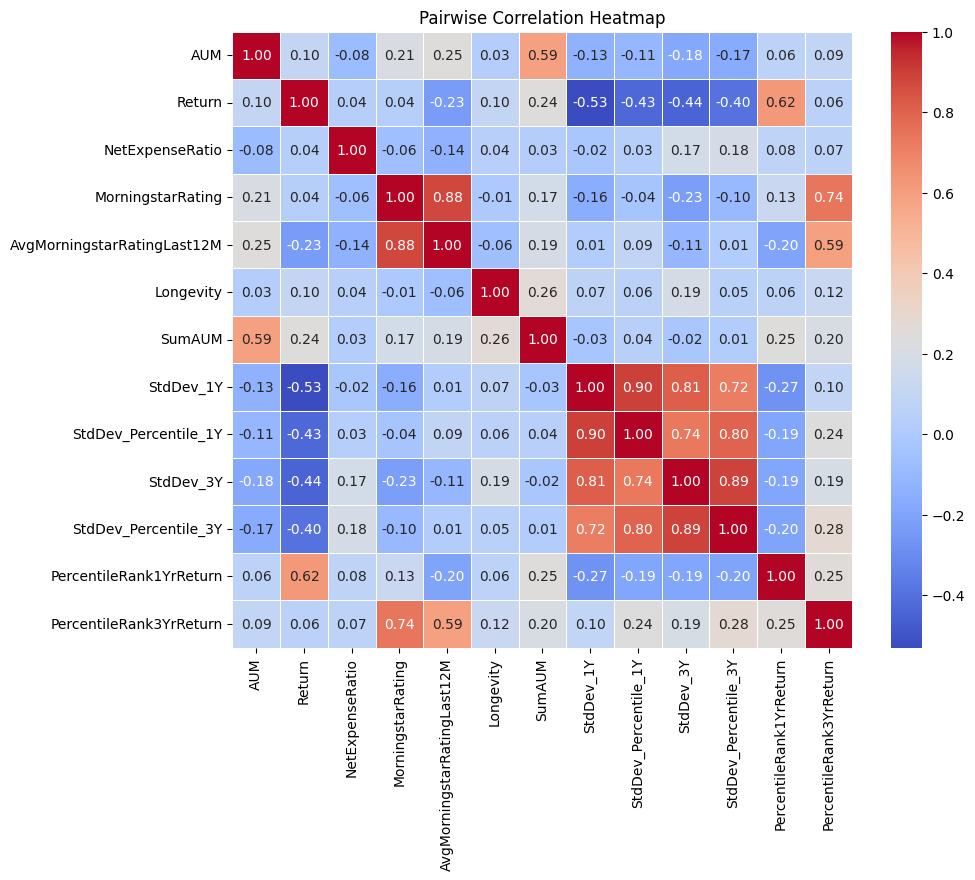

In [0]:
correlation_matrix = X_2.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

In [0]:
df_X = pd.DataFrame(X_scale)
num_features = len(df_X.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column in X and plot a histogram for each feature
for i, column in enumerate(df_X.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust the subplot layout dynamically
    sns.histplot(df_X[column], bins=20, kde=True)  # Customize bins and other parameters as needed
    plt.title(column)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

## 2. Check clusterability

## t-sne tutorial - how to explain
[t-sne explanation](https://distill.pub/2016/misread-tsne/)

In [0]:
# a small perplexity can generate more well-separated results
tsne = TSNE(n_components=2, random_state=42, perplexity = 10)
projections = tsne.fit_transform(X_scale)
projections

fig = px.scatter(
    projections,x=0,y=1,
    color=df.Fund
)
fig.show()

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [0]:
tsne = TSNE(n_components=3, random_state=42, perplexity=6)
projections = tsne.fit_transform(X_scale,)

fig = px.scatter_3d(
    projections,x=0,y=1,z=2,
    color=df.Fund
)
fig.show()

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [0]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA()

# Fit the PCA model on the scaled data
pca.fit(X_scale)

# Transform the data into the new coordinate system defined by the principal components
X_pca = pca.transform(X_scale)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print out the saying of each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.2%} of the variance")

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Component 1: 30.47% of the variance
Component 2: 20.88% of the variance
Component 3: 13.67% of the variance
Component 4: 10.21% of the variance
Component 5: 7.25% of the variance
Component 6: 6.96% of the variance
Component 7: 2.78% of the variance
Component 8: 2.73% of the variance
Component 9: 2.28% of the variance
Component 10: 1.22% of the variance
Component 11: 1.08% of the variance
Component 12: 0.33% of the variance
Component 13: 0.14% of the variance


In [0]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scale)

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

### Agglomerative Clustering


 - It doesn't require to specify the number of clusters in advance (although you can).
 - It's particularly adept at revealing hierarchical structures within the data, which could be insightful given the nature of financial products.
 - It can accommodate the mixed data types (continuous and binary variables) that come from feature engineering.

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 2 The average silhouette_score is : 0.20580621076645658


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 3 The average silhouette_score is : 0.14865620338631827


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 4 The average silhouette_score is : 0.17196718202812508


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 5 The average silhouette_score is : 0.1823087154292241


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 6 The average silhouette_score is : 0.1880366365701289


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 7 The average silhouette_score is : 0.20495449353883682


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 8 The average silhouette_score is : 0.19942917178051864


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 9 The average silhouette_score is : 0.20491719078088033


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 10 The average silhouette_score is : 0.1776838867011109


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 11 The average silhouette_score is : 0.19002362100374334


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 12 The average silhouette_score is : 0.1921949221887902


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 13 The average silhouette_score is : 0.197347093689496


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 14 The average silhouette_score is : 0.1956848496837139


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 15 The average silhouette_score is : 0.19204212840488202


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 16 The average silhouette_score is : 0.1965893608220972


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 17 The average silhouette_score is : 0.18671480931522055


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 18 The average silhouette_score is : 0.18523265273154815


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 19 The average silhouette_score is : 0.19129145248968893


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 20 The average silhouette_score is : 0.1857111056920654


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 21 The average silhouette_score is : 0.18583377221229094


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 22 The average silhouette_score is : 0.19114525804246202


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 23 The average silhouette_score is : 0.18784863104275196


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 24 The average silhouette_score is : 0.18122050046913132


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 25 The average silhouette_score is : 0.17326270640647543


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 26 The average silhouette_score is : 0.17287038421540898


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 27 The average silhouette_score is : 0.17194207618303983


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 28 The average silhouette_score is : 0.16853991762750858


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

For n_clusters = 29 The average silhouette_score is : 0.15918763517411327


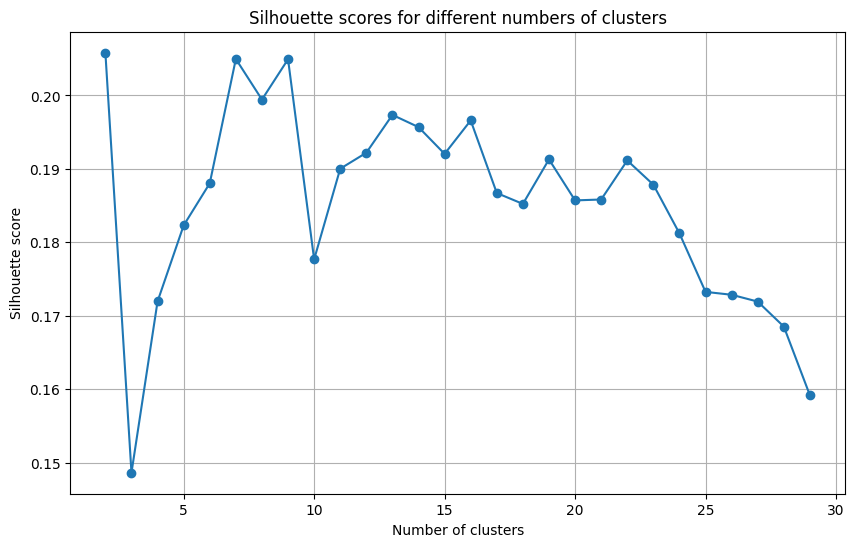

The optimal number of clusters is: 2


In [0]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


silhouette_scores = []
range_n_clusters = list(range(2, 30))  

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and fit it
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

# The optimal cluster number is the one with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("The optimal number of clusters is:", optimal_n_clusters)


In [0]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

n_clusters = 7
# Perform Agglomerative Clustering on t-SNE projections
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(projections)

# Convert projections and cluster labels into a DataFrame for visualization
import pandas as pd
df_clusters = pd.DataFrame(projections, columns=['x', 'y', 'z'])
df_clusters['cluster'] = agg_clusters

fig = px.scatter_3d(df_clusters, x='x', y='y', z='z',
                    color='cluster',
                    color_continuous_scale=px.colors.qualitative.Set1,
                    opacity=0.7)  # Adjust opacity as needed
fig.show()

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [0]:
joined_df = df.merge(df_clusters[['cluster']], left_index=True, right_index=True)
joined_df.head()#join the cluster column to original dataframe


,AUM,NetFlows,Return,Fund,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn,cluster
0,1.517838e+09,-1.024069e+08,-0.000290,AB Select US Long/Short Portfolio,1.55,5.0,5.000000,3671,1.422658e+11,1.032871e+09,0.000272,0.531086,0.000307,0.646922,31.034483,63.793103,0
1,5.677665e+08,1.062613e+07,0.000182,AQR Long-Short Equity Fund,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448,5
2,7.869107e+07,-2.098664e+05,-0.000306,AXS Dynamic Opportunity Fund,1.72,3.0,3.000000,2902,6.873105e+09,6.973458e+07,0.000175,0.207238,0.000310,0.658985,17.241379,32.758621,4
3,4.679206e+08,-1.321287e+07,-0.000208,Alger Dynamic Opportunities Fund,0.87,5.0,5.000000,4807,2.764655e+10,4.306798e+08,0.000333,0.700742,0.000397,0.825240,15.517241,87.931034,3
4,6.273995e+08,-8.593926e+06,-0.000170,Allspring Global Long/Short Equity Fund,1.47,2.0,2.416667,2941,5.532944e+10,5.297114e+08,0.000420,0.852614,0.000368,0.777297,55.172414,34.482759,2


In [0]:
calamos_rows = joined_df[joined_df['Fund'].str.contains('calamos', case=False)]
calamos_rows[['Fund','cluster']]

,Fund,cluster
13,Calamos Phineus Long/Short Fund,5


In [0]:
joined_df[joined_df['cluster'] == 5]

,AUM,NetFlows,Return,Fund,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn,cluster
1,567766501.0,1.062613e+07,0.000182,AQR Long-Short Equity Fund,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448,5
9,164904207.0,1.614381e+07,0.000027,Boston Partners Global Long/Short Fund,1.81,4.0,3.500000,3287,5.134130e+10,1.308930e+08,0.000319,0.667337,0.000395,0.820755,98.275862,94.827586,5
10,67593224.0,-8.708738e+05,-0.000075,Boston Partners Long/Short Equity Fund,1.96,3.0,3.000000,8810,8.168282e+10,-2.217951e+08,0.000447,0.885555,0.000526,0.961027,89.655172,89.655172,5
13,822855415.0,1.541100e+07,-0.000412,Calamos Phineus Long/Short Fund,1.44,3.0,3.166667,2461,4.917781e+10,7.128040e+08,0.000491,0.916022,0.000576,0.969997,79.310345,86.206897,5
15,141184587.0,5.407000e+06,-0.000217,Cambria Value and Momentum ETF,0.59,4.0,2.916667,2671,1.467342e+09,9.844343e+07,0.000409,0.839468,0.000441,0.893752,91.379310,96.551724,5


In [0]:
calamos_rows = joined_df[joined_df['Fund'].str.contains('JP', case=False)]
calamos_rows[['Fund','cluster']]

,Fund,cluster
33,JPMorgan Opportunistic Equity L/S Fd,1


In [0]:
joined_df[joined_df['cluster'] == 1][['Fund','cluster']]

,Fund,cluster
6,AmericaFirst Defensive Growth Fund,1
8,Boston Partners Emerging Mkts Dyn Eq Fd,1
12,CRM Long/Short Opportunities Fund,1
17,Counterpoint Tactical Equity Fund,1
21,Fintrust Income and Opportunity Fund,1
24,Gotham Defensive Long 500 Fund,1
26,Gotham Hedged Plus Fund,1
33,JPMorgan Opportunistic Equity L/S Fd,1
35,LoCorr Dynamic Opportunity Fund,1
39,Multi-Manager Directional Alt Strat Fd,1


In [0]:
import pandas as pd


# We use qcut with 10 bins to create the deciles. Labels are assigned such that the highest values fall into the 1st decile
joined_df['Decile'] = pd.qcut(joined_df['SumNetFlows'], 10, labels=range(10, 0, -1))

# Check the created decile column
joined_df.head()


,AUM,NetFlows,Return,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn,cluster,Decile
0,1.517838e+09,-1.024069e+08,-0.000290,1.55,5.0,5.000000,3671,1.422658e+11,1.032871e+09,0.000272,0.531086,0.000307,0.646922,31.034483,63.793103,0,1
1,5.677665e+08,1.062613e+07,0.000182,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448,5,1
2,7.869107e+07,-2.098664e+05,-0.000306,1.72,3.0,3.000000,2902,6.873105e+09,6.973458e+07,0.000175,0.207238,0.000310,0.658985,17.241379,32.758621,4,5
3,4.679206e+08,-1.321287e+07,-0.000208,0.87,5.0,5.000000,4807,2.764655e+10,4.306798e+08,0.000333,0.700742,0.000397,0.825240,15.517241,87.931034,3,2
4,6.273995e+08,-8.593926e+06,-0.000170,1.47,2.0,2.416667,2941,5.532944e+10,5.297114e+08,0.000420,0.852614,0.000368,0.777297,55.172414,34.482759,2,1


In [0]:
import pandas as pd


# Define the quartile labels. The highest values will be in Q1, the lowest in Q4.
quartile_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Use qcut to assign each 'SumNetFlows' value to a quartile, with quartile labels
joined_df['Quartile'] = pd.qcut(joined_df['SumNetFlows'], 4, labels=quartile_labels[::-1])

# The DataFrame now has a 'Quartile' column with the quartile group for each row
joined_df.head()


,AUM,NetFlows,Return,NetExpenseRatio,MorningstarRating,AvgMorningstarRatingLast12M,Longevity,SumAUM,SumNetFlows,StdDev_1Y,StdDev_Percentile_1Y,StdDev_3Y,StdDev_Percentile_3Y,PercentileRank1YrReturn,PercentileRank3YrReturn,cluster,Decile,Quartile
0,1.517838e+09,-1.024069e+08,-0.000290,1.55,5.0,5.000000,3671,1.422658e+11,1.032871e+09,0.000272,0.531086,0.000307,0.646922,31.034483,63.793103,0,1,Q1
1,5.677665e+08,1.062613e+07,0.000182,1.31,3.0,2.750000,3455,1.647134e+11,7.278099e+08,0.000530,0.935973,0.000472,0.920662,100.000000,93.103448,5,1,Q1
2,7.869107e+07,-2.098664e+05,-0.000306,1.72,3.0,3.000000,2902,6.873105e+09,6.973458e+07,0.000175,0.207238,0.000310,0.658985,17.241379,32.758621,4,5,Q2
3,4.679206e+08,-1.321287e+07,-0.000208,0.87,5.0,5.000000,4807,2.764655e+10,4.306798e+08,0.000333,0.700742,0.000397,0.825240,15.517241,87.931034,3,2,Q1
4,6.273995e+08,-8.593926e+06,-0.000170,1.47,2.0,2.416667,2941,5.532944e+10,5.297114e+08,0.000420,0.852614,0.000368,0.777297,55.172414,34.482759,2,1,Q1


In [0]:
import pandas as pd

# Count the number of rows in each cluster
cluster_counts = joined_df['cluster'].value_counts()

# Print the number of rows in each cluster
print(cluster_counts)


cluster
1    12
3    11
0    10
4     8
2     8
5     5
6     4
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

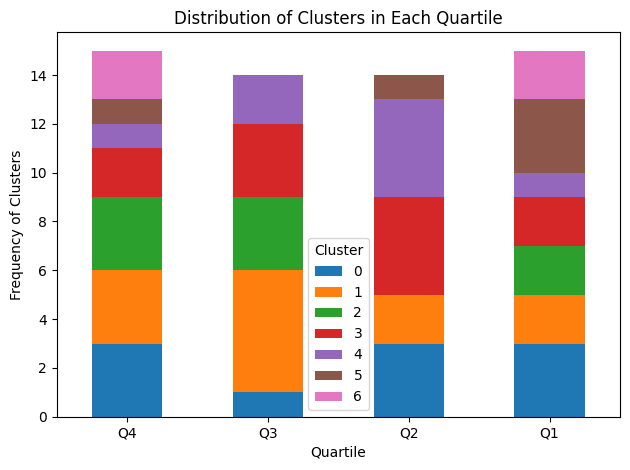

In [0]:
cluster_distribution = joined_df.groupby('Quartile')['cluster'].value_counts().unstack(fill_value=0)

# Plotting the distribution of clusters in each quartile
plt.figure(figsize=(10, 6))
cluster_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Clusters in Each Quartile')
plt.xlabel('Quartile')
plt.ylabel('Frequency of Clusters')
plt.xticks(rotation=0)  # Keep the Quartile labels horizontal
plt.legend(title='Cluster')
plt.tight_layout()

In [0]:
distribution = (joined_df.groupby('cluster')['Quartile']
                            .value_counts(normalize=True)  # This computes the relative frequencies
                             # Converts fractions to percentages
                            .unstack(fill_value=0))
distribution

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
distribution1 = (joined_df.groupby('cluster')['Decile']
                            .value_counts(normalize=True)  # This computes the relative frequencies
                             # Converts fractions to percentages
                            .unstack(fill_value=0))
distribution1

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
cluster_distribution1 = joined_df.groupby('Decile')['cluster'].value_counts().unstack(fill_value=0)

# Plotting the distribution of clusters in each quartile
plt.figure(figsize=(10, 6))
cluster_distribution1.plot(kind='bar', stacked=True)
plt.title('Distribution of Clusters in Each Decile')
plt.xlabel('Quartile')
plt.ylabel('Frequency of Clusters')
plt.xticks(rotation=0)  # Keep the Quartile labels horizontal
plt.legend(title='Cluster')
plt.tight_layout()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

## 3. Try again but log AUM and AUMSUM

In [0]:
df_2 = df.copy()
df_2.hist()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_2.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_2['AUM'] =df_2['AUM'] = np.log(df_2['AUM'])
df_2['SumAUM'] = df_2['SumAUM'] = np.log(df_2['SumAUM'])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_2.hist()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
X_2 = df_2.copy()
X_2.drop(['Fund'], axis=1, inplace=True)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
X_2_scale = StandardScaler().fit_transform(X_2)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
# a small perplexity can generate more well-separated results
tsne = TSNE(n_components=2, random_state=42, perplexity = 15)
projections = tsne.fit_transform(X_2_scale)
projections

fig = px.scatter(
    projections,x=0,y=1,
    color=df_2.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
tsne = TSNE(n_components=3, random_state=42, perplexity=15)
projections = tsne.fit_transform(X_2_scale,)

fig = px.scatter_3d(
    projections,x=0,y=1,z=2,
    color=df.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

n_clusters = 6 

# Perform Agglomerative Clustering on t-SNE projections
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(projections)

# Convert projections and cluster labels into a DataFrame for visualization
import pandas as pd
df_clusters = pd.DataFrame(projections, columns=['x', 'y', 'z'])
df_clusters['cluster'] = agg_clusters

# Now visualize the clustering results with Plotly
fig = px.scatter_3d(df_clusters, x='x', y='y', z='z',
                    color='cluster',
                    color_continuous_scale=px.colors.qualitative.D3)  # or any other color scale you prefer
fig.show()


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
## 3. Try again but less features

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_3 = df_2.copy()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
# handle curse of dimensionality
df_3.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
# use SumAUM rather than AUM, SumAUM can better demostrate the size and reputation of a company
# remove all 5 years feature since the range is too big
df_3.drop(['AUM', 'StdDev_5Y', 'Percentile_5Y', 'PercentileRank5YrReturn'], axis=1, inplace=True)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_3.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
# I tried and it doesn't make thing any better -> drop more
# remove return - we don't care the return for the time to make snapshot only, we care the overall performance (prcentile & std)
# remove MorningstarRating - the same reason
# remove all PercentileRank - it do not understand what that feature is designed for - they are not relevant, high corr with percentile
df_3.drop(['Return', 'MorningstarRating', 'PercentileRank1YrReturn', 'PercentileRank3YrReturn'], axis=1, inplace=True)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_3.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
X_3 = df_3.copy()
X_3.drop(['Fund'], axis=1, inplace=True)
X_3_scale = StandardScaler().fit_transform(X_3)
# a small perplexity can generate more well-separated results
tsne = TSNE(n_components=2, random_state=42, perplexity = 20)
projections = tsne.fit_transform(X_3_scale)
projections

fig = px.scatter(
    projections,x=0,y=1,
    color=df_3.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
projections = tsne.fit_transform(X_3_scale,)

fig = px.scatter_3d(
    projections,x=0,y=1,z=2,
    color=df.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

n_clusters = 6 

# Perform Agglomerative Clustering on t-SNE projections
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(projections)

# Convert projections and cluster labels into a DataFrame for visualization
import pandas as pd
df_clusters = pd.DataFrame(projections, columns=['x', 'y', 'z'])
df_clusters['cluster'] = agg_clusters

# Now visualize the clustering results with Plotly
fig = px.scatter_3d(df_clusters, x='x', y='y', z='z',
                    color='cluster',
                    color_continuous_scale=px.colors.qualitative.D3)  # or any other color scale you prefer
fig.show()


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_4  = df_3.copy()
df_4.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
# remove - Longevity, what will check the history of a fund? AUM can be a more reasonable feature if you wanna access reputation
# remove - 3 years data
df_4.drop(['Longevity', 'StdDev_3Y', 'Percentile_3Y'], axis=1, inplace=True)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
df_4.columns

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
X_4 = df_4.copy()
X_4.drop(['Fund'], axis=1, inplace=True)
X_4_scale = StandardScaler().fit_transform(X_4)
# a small perplexity can generate more well-separated results
tsne = TSNE(n_components=2, random_state=42, perplexity = 44)
projections = tsne.fit_transform(X_4_scale)
projections

fig = px.scatter(
    projections,x=0,y=1,
    color=df_4.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
tsne = TSNE(n_components=3, random_state=44, perplexity=5)
projections = tsne.fit_transform(X_4_scale,)

fig = px.scatter_3d(
    projections,x=0,y=1,z=2,
    color=df_4.Fund
)
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined

In [0]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

n_clusters = 6 

# Perform Agglomerative Clustering on t-SNE projections
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(projections)

# Convert projections and cluster labels into a DataFrame for visualization
import pandas as pd
df_clusters = pd.DataFrame(projections, columns=['x', 'y', 'z'])
df_clusters['cluster'] = agg_clusters

# Now visualize the clustering results with Plotly
fig = px.scatter_3d(df_clusters, x='x', y='y', z='z',
                    color='cluster',
                    color_continuous_scale=px.colors.qualitative.D3)  # or any other color scale you prefer
fig.show()


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2241051161917221>, line 1
----> 1 stop

NameError: name 'stop' is not defined